## **TIER Protocol**
##### Tomasz Bronikowski
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../Original Data/1_KUJAWSKO-POMORSKIE.csv")
df


,Unnamed: 0,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,0,13,Electrolux,38.0,K,2.5
1,1,6,Beko,30.0,K,2.0
2,2,6,Dyson,43.0,K,2.5
3,3,5,Beko,NaN,M,3.0
4,4,10,Dyson,42.0,K,3.5
...,...,...,...,...,...,...
453,453,4,Dyson,26.0,M,2.0
454,454,6,Electrolux,30.0,M,3.0
455,455,9,Samsung,31.0,M,0.5
456,456,7,Dyson,30.0,K,2.0


**Usunięcie NaN**

In [2]:
df = df.dropna()
df = df.drop(columns=['Unnamed: 0'])
df

,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,13,Electrolux,38.0,K,2.5
1,6,Beko,30.0,K,2.0
2,6,Dyson,43.0,K,2.5
4,10,Dyson,42.0,K,3.5
5,9,Dyson,49.0,K,1.0
...,...,...,...,...,...
453,4,Dyson,26.0,M,2.0
454,6,Electrolux,30.0,M,3.0
455,9,Samsung,31.0,M,0.5
456,7,Dyson,30.0,K,2.0


**Typy danych**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 457
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dni od zakupu    413 non-null    int64  
 1   Marka            413 non-null    object 
 2   Wiek kupującego  413 non-null    float64
 3   Płeć kupującego  413 non-null    object 
 4   Ocena            413 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.4+ KB


In [4]:
df.describe()
df.to_csv('../Analysis Data/1_KUJAWSKO-POMORSKIE_tidy.csv')

**Zamiana formatu na int**

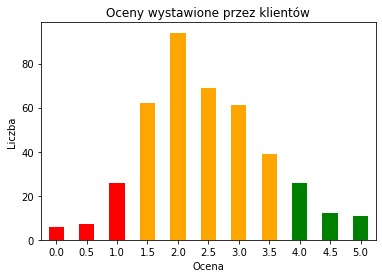

In [5]:
df_rate = df.filter(['Ocena']).groupby('Ocena').size()
plot = df_rate.plot.bar(title='Oceny wystawione przez klientów',rot=0, xlabel='Ocena', ylabel='Liczba', grid=False,color=['red','red','red', 'orange','orange','orange','orange','orange', 'green','green','green'])
 
fig = plot.get_figure()
fig.savefig('../Analysis Data/Oceny_wykres.png')

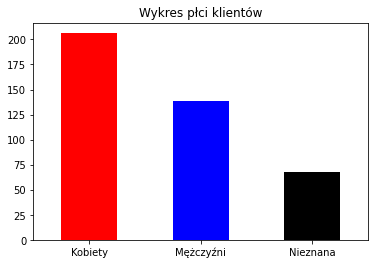

In [6]:
female_count = df['Płeć kupującego'].value_counts()['K']
male_count = df['Płeć kupującego'].value_counts()['M']
unknown_count = df['Płeć kupującego'].value_counts()['bd.']

df_plec = pd.DataFrame({'Płeć': ['Kobiety', 'Mężczyźni', 'Nieznana'],'Ilość': [female_count, male_count, unknown_count]})

plot = df_plec.plot.bar(x='Płeć', y='Ilość', rot=0, grid=False, title='Wykres płci klientów',legend = False,color=['red', 'blue', 'black'],xlabel ='')

fig = plot.get_figure()
fig.savefig('../Analysis Data/Plec_wykres.png')

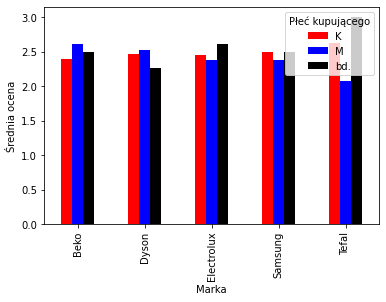

In [7]:
plot = df.pivot_table('Ocena', index='Marka', columns='Płeć kupującego', aggfunc="mean").plot.bar(ylabel='Średnia ocena',color=['red', 'blue', 'black'])
fig = plot.get_figure()
fig.savefig('../Analysis Data/Srednia_ocena_wedlug_plci_i_marki_wykres.png')